
LUIS EDUARDO SANTANDER RODRÍGUEZ <luis.santander@udea.edu.co>
8:29 (hace 9 minutos)
para ANLLY, ESNEIDER, mí

<h2><center> Exercises </center></h2>


1. Computes the integral $$ \int_0^1 dx \frac{4}{1+x^2} $$ by Riemman sums with $N=1,10^2, 10^4,10^6, 10^8$ and gives percent error and computational time. Predict the computational time for $N=10^{12}$, and obtain the minimum $N$ for error $10^{-6}$.

<h2><center>  </center></h2>


In [235]:
import numpy as np
import scipy.integrate as integrate
import time
import matplotlib.pyplot as plt

In [236]:
f = lambda x: 4./(1.+x**2)

In [237]:
t_list = []
i_list = []
e_list = []
for j in range(0,9,2):
    
    t0=time.time()
    
    a=0
    b=1.
    N=10**j
    dx=(b-a)/N

    sum = 0
    n=np.arange(a,b,dx)
    for i in n:
        sum+=f(i)*dx
    error = abs(sum-np.pi)/np.pi
    
    tiempo_comp=time.time()-t0
    t_list.append(tiempo_comp)
    i_list.append(j)
    e_list.append(error)
    print("Para N=10e %d, f(x)= %.16e, error=%.2e, t=%.2e s" %(j,sum,error,tiempo_comp))

Para N=10e 0, f(x)= 4.0000000000000000e+00, error=2.73e-01, t=8.39e-05 s
Para N=10e 2, f(x)= 3.1515759869231270e+00, error=3.18e-03, t=3.95e-04 s
Para N=10e 4, f(x)= 3.1416926519231168e+00, error=3.18e-05, t=1.85e-02 s
Para N=10e 6, f(x)= 3.1415936535895672e+00, error=3.18e-07, t=1.10e+00 s
Para N=10e 8, f(x)= 3.1415926635900346e+00, error=3.18e-09, t=1.18e+02 s


El error decrece en un factor de $10^{-N-2}$, para $10^{-16}$, N=e 18

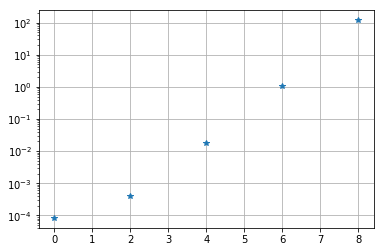

In [238]:
fig=plt.figure()
plt.subplot(2,1,1)
ax=plt.axes()
ax.grid()
ax.plot(i_list,e_list,'*')
ax.set_yscale('log')

plt.subplot(2,1,2)
ax=plt.axes()
ax.grid()
ax.plot(i_list,t_list,'*')
ax.set_yscale('log')
plt.show()

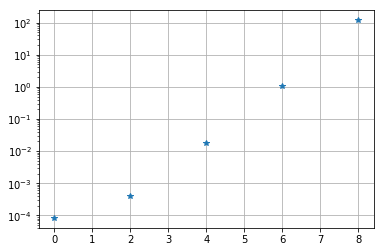

In [239]:
fig=plt.figure()
ax=plt.axes()
ax.grid()
ax.plot(i_list,t_list,'*')
ax.set_yscale('log')
plt.show()

2. An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter in the first second 
$$ N(1) = \int_0^1 e^{-t} dt$$
Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

In [94]:
f = lambda t: np.exp(-t)

In [95]:
int_f = lambda a,b: -np.exp(-b)+np.exp(-a) #integral verdadera

In [182]:
### Composite Trapezoidal Rule
def TrapComp(f,a,b,n):
    h=(b-a)/np.float(n) #Espaciamiento

    sum = 0
    for i in range(1,n):
        sum+= f(a+h*i) 
    return h/2.*(f(a)+2.*sum+f(b))
    return sum

In [183]:
### Simpsons Composite Rule
def SimpComp(f,a,b,n): 
    
    h = (b-a)/np.float(n) #Espaciamiento
    
    x_node = np.zeros(n+1) # Vector de nodos
    
    for i in range(n+1): 
        x_node[i] = a+ h*i
            
    #Integracion
    suma_impar = 0
    for i in range(1,int(n/2.)+1):
        suma_impar += f(x_node[2*i-1])
    
    suma_par = 0
    for i in range(1,int(n/2.)):
        suma_par+= f(x_node[2*i])

    return h/3.*(f(a)+2.*suma_par+4.*suma_impar+f(b))

In [213]:
def N1(t,n): # integral calculada con Simpson Compuesta con n nodos
    error = abs(int_f(0,t)-SimpComp(f,0,t,n))
    return (SimpComp(f,0,t,n), error)

def N2(t,n): # integral calculada con Trapezoide Compuesta con n nodos
    error = abs(int_f(0,t)-TrapComp(f,0,t,n))
    return (TrapComp(f,0,t,n), error)

In [257]:
n=10 # Las particiones que hago son n*t para que cada integral se calcule sobre los mismos nodos igualmente espaciados
t_list=[i for i in range(0,10)] #Tiempo de 1 a 10 segundos, si se toma t mayores, se supera el épsilon de la máquina

N1_list = [N1(t,n)[0] for t in t_list] #Lista de integrales hechas con Simpson Compuesta
N1_error = [N1(t,n)[1] for t in t_list] #Errores absolutos 

N2_list = [N2(t,n)[0] for t in t_list] #Lista de integrales hechas con Trapecio Compuesta 
N2_error = [N2(t,n)[1] for t in t_list] #Errores absolutos

f_int_list = [int_f(0,t) for t in t_list] #Lista de los valores reales de la integral 

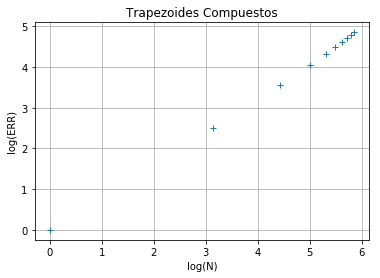

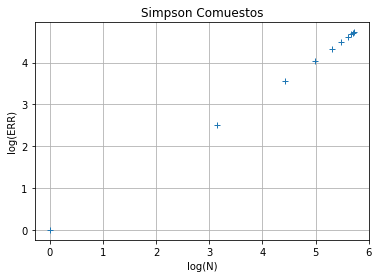

In [258]:
#Graficas
fig=plt.figure()
plt.subplot(1,2,1)
ax=plt.axes()
ax.grid()
ax.plot(N2_list,N2_error,'+')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('log(N)')
plt.ylabel('log(ERR)')
plt.title('Trapezoides Compuestos')
plt.show()

plt.subplot(1,2,2)
ax=plt.axes()
ax.grid()
ax.plot(N1_list,N1_error,'+')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('log(N)')
plt.ylabel('log(ERR)') 
plt.title('Simpson Comuestos')
plt.show('T1')

Se observa que el error es mucho menor en el Metodo de Simpson Compuesto en un factor de $10^{-5}$